In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

In [23]:
# Check dimensions, data types, and missing values
print(tips.shape)
print(tips.info())
print(tips.isnull().sum())

# Basic statistics for numerical features
print(tips.describe())

(244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3

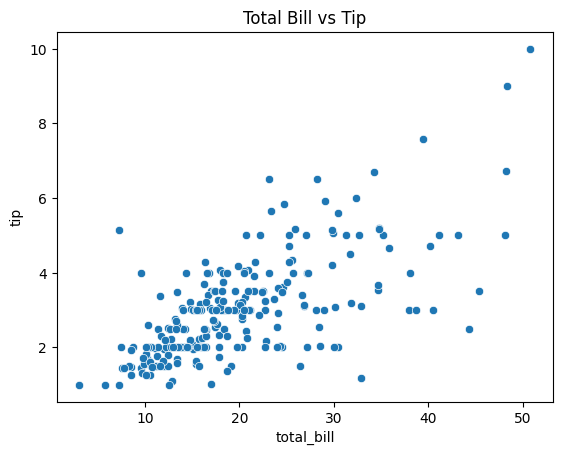

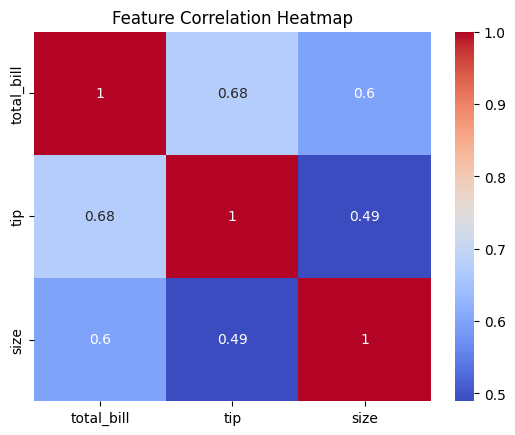

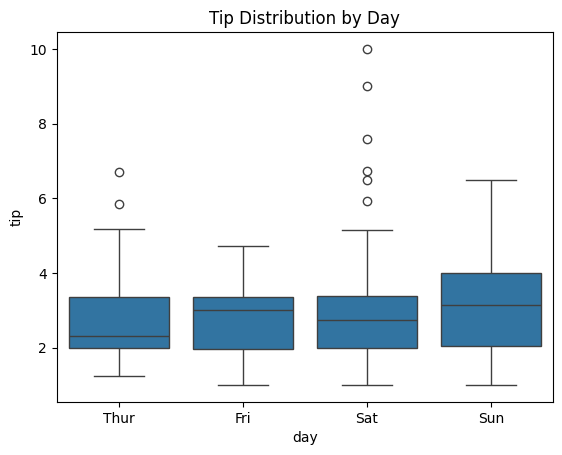

In [24]:
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title("Total Bill vs Tip")
plt.show()

# Compute correlation only for numerical columns
numeric_df = tips.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

sns.boxplot(x='day', y='tip', data=tips)
plt.title("Tip Distribution by Day")
plt.show()

In [25]:
# Convert categorical variables (day, time, sex) into numerical format using one-hot encoding
tips = pd.get_dummies(tips, columns=['day', 'time', 'sex','smoker'], drop_first=True)

# Scaling numerical features (if necessary)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tips[['total_bill', 'size']] = scaler.fit_transform(tips[['total_bill', 'size']])

In [26]:
from sklearn.model_selection import train_test_split

X = tips.drop('tip', axis=1)  # Features
y = tips['tip']                # Target variable

# Split the data (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [27]:

# linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_val_pred = model.predict(X_val)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'MSE: {mse}, MAE: {mae}, R²: {r2}')

MSE: 1.282555402712956, MAE: 0.8782053092807001, R²: 0.14285355403240707


In [29]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Example using Ridge regression
ridge = Ridge()

parameters = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(ridge, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_
y_val_pred_ridge = best_ridge.predict(X_val)

# Evaluation of the best ridge model
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
print(f'Best Ridge Model MSE: {mse_ridge}')

Best Ridge Model MSE: 1.2148943014836753


Test Set MSE of Best Ridge Model: 0.8686406239723161


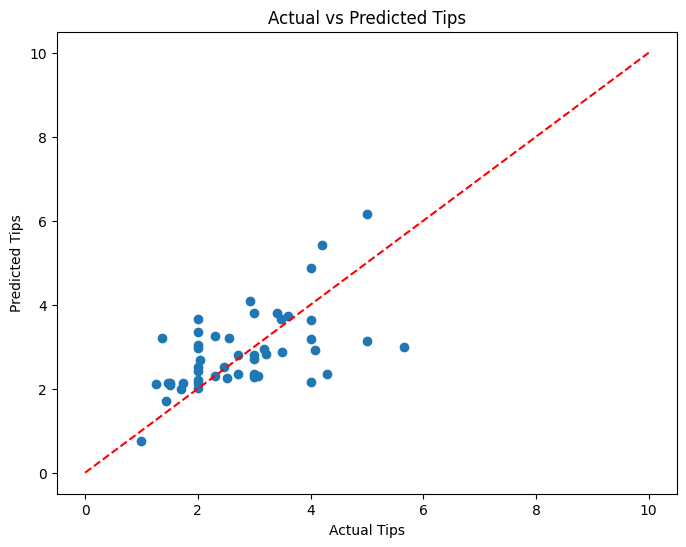

In [30]:
y_test_pred = best_ridge.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Test Set MSE of Best Ridge Model: {mse_test}')

# Visualizing predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([0, 10], [0, 10], '--', color='red')
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Actual vs Predicted Tips')
plt.show()

In [31]:
# Output coefficients of the best Ridge model
coefficients = pd.DataFrame(best_ridge.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

             Coefficient
total_bill      0.792604
size            0.388496
day_Fri         0.033091
day_Sat         0.019307
day_Sun        -0.084749
time_Dinner    -0.104430
sex_Female     -0.124791
smoker_No       0.154541
